# Simple Starter Notebook for;
## UmojaHack Africa 2021 #2: Sendy - Delivery Rider Response Challenge by UmojaHack Africa

Can you predict who is the best delivery rider for an order placed via logistics company Sendy?

![Umoja Hack](https://zindpublic.blob.core.windows.net/public/uploads/competition/image/152/thumb_c5ec4e2a-e000-4176-a93c-dd1143c2b60f.png)

The objective of this challenge is to create a machine learning model that will predict whether a rider will accept, decline or ignore an order sent to them.

## Defining the Question

### Specifying the Data Analytics question

The objective of this challenge is to create a machine learning model that will predict whether a rider will accept, decline or ignore an order sent to them.

## Defining the Metric of Success

## Understanding the Contest

## Experimental Design

## Data Relevance

## Reading Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier# classification
from sklearn.metrics import accuracy_score
import seaborn as sns
 
from pandas_profiling import ProfileReport

In [7]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
 
!ls "/content/drive/MyDrive/UHSendy"

Riders.csv	      Sendy_UmojaHack_StarterNotebook.ipynb  Train.csv
SampleSubmission.csv  Test.csv


In [10]:
# Load files
train = pd.read_csv('/content/drive/MyDrive/UHSendy/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/UHSendy/Test.csv')
riders = pd.read_csv('/content/drive/MyDrive/UHSendy/Riders.csv')
ss = pd.read_csv('/content/drive/MyDrive/UHSendy/SampleSubmission.csv')

In [11]:
# check data colums & rows
train.shape, test.shape, riders.shape

((179867, 21), (76791, 20), (2632, 4))

In [12]:
# Preview train
train.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,96531,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,103546,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0


In [13]:
test.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long
0,ID_3B4D2Q2DSI,28636,2,6,12:10:59,593630,Business,0,2,Bike,57224,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240
1,ID_7MPWFJ9XFI,60465,11,4,17:10:03,2378775,Personal,1,2,Bike,106329,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558
2,ID_5VVT3Q3M5B,25249,30,3,12:02:01,2121681,Personal,0,2,Bike,90551,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860
3,ID_C2GTVS1H7K,21224,27,2,11:10:32,38801,Business,0,2,Bike,90482,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921
4,ID_0YGC8V3PFT,58287,14,6,16:12:55,153111,Business,0,2,Bike,101959,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454


In [14]:
riders.head()

,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [15]:
ss.head()

,ID,target
0,ID_3B4D2Q2DSI,0
1,ID_7MPWFJ9XFI,0
2,ID_5VVT3Q3M5B,0
3,ID_C2GTVS1H7K,0
4,ID_0YGC8V3PFT,0


In [16]:
ss.dtypes

ID        object
target     int64
dtype: object

## Column Description

- ID - Unique ID for each order request
- order_id – Unique number identifying the order
- client_id - Unique number identifying the customer on a platform
- client_type - Specifies the customer type (Business or Personal)
- rider_id - Unique number to uniquely identify the rider
- rider_license_status - Identifies riders who have a license to access restricted areas i.e. 0 (Cannot access a restricted area) and 1 (Can access a restricted area)
- rider_carrier_type - Identifies the box option that a rider currently has i.e. 0 (No Box option) and 1 (Box option)
- rider_amount - The earnings a partner would earn if they successfully complete an order.
- order_license_status - Identifies orders that require a pick-up or drop-off in a restricted area i.e. 0 (Restricted area) and 1 (Non-Restricted area)
- order_carrier_type - Identifies the box option the customer specified while placing their orders i.e. 0 (No box option), 1 (Box option), 2 (Any option)
- vendor_type – For this competition limited to bikes. However, in practice, Sendy’s service extends to Vans and Trucks.
- Pickup Latitude and Longitude (pickup_lat and pickup_long) - Latitude and longitude of pick up location
- Destination Latitude and Longitude (drop_off_lat and drop_off_long) - Latitude and longitude of delivery location
- Rider Latitude and Longitude (rider_lat and rider_long) - Latitude and longitude of the Rider at the time of dispatch.
- target - The reaction of a rider in regards to a particular dispatch. Did a rider ignore (0), decline (1) or accept (2) a dispatch?

### Dispatch times

- dispatch_day - Day of Month i.e. 1-31
-dispatch_day_of_week - Weekday (Monday = 1)
- dispatch_time - Time of day the dispatch was sent out to the riders

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    179867 non-null  object 
 1   order_id              179867 non-null  int64  
 2   dispatch_day          179867 non-null  int64  
 3   dispatch_day_of_week  179867 non-null  int64  
 4   dispatch_time         179867 non-null  object 
 5   client_id             179867 non-null  int64  
 6   client_type           179867 non-null  object 
 7   order_license_status  179867 non-null  int64  
 8   order_carrier_type    179867 non-null  int64  
 9   vendor_type           179867 non-null  object 
 10  rider_id              179867 non-null  int64  
 11  rider_license_status  179867 non-null  int64  
 12  rider_carrier_type    179867 non-null  int64  
 13  rider_amount          179867 non-null  int64  
 14  rider_lat             179867 non-null  float64
 15  

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76791 entries, 0 to 76790
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    76791 non-null  object 
 1   order_id              76791 non-null  int64  
 2   dispatch_day          76791 non-null  int64  
 3   dispatch_day_of_week  76791 non-null  int64  
 4   dispatch_time         76791 non-null  object 
 5   client_id             76791 non-null  int64  
 6   client_type           76791 non-null  object 
 7   order_license_status  76791 non-null  int64  
 8   order_carrier_type    76791 non-null  int64  
 9   vendor_type           76791 non-null  object 
 10  rider_id              76791 non-null  int64  
 11  rider_license_status  76791 non-null  int64  
 12  rider_carrier_type    76791 non-null  int64  
 13  rider_amount          76791 non-null  int64  
 14  rider_lat             76791 non-null  float64
 15  rider_long         

In [19]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rider ID                2632 non-null   int64  
 1   Active Rider Age        2632 non-null   int64  
 2   Average Partner Rating  2632 non-null   float64
 3   Number of Ratings       2632 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 82.4 KB


## Data Cleaning

I'll  follow the ELT Approach where you extract, load then Transorm

I'll convert all columns to lowercase for uniformity

In [20]:
# Standardising column names to lower case and removing trailing spaces
train.columns = train.columns.str.lower()
train.head()

,id,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,96531,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,103546,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0


In [21]:
train.isnull().sum()

id                      0
order_id                0
dispatch_day            0
dispatch_day_of_week    0
dispatch_time           0
client_id               0
client_type             0
order_license_status    0
order_carrier_type      0
vendor_type             0
rider_id                0
rider_license_status    0
rider_carrier_type      0
rider_amount            0
rider_lat               0
rider_long              0
pickup_lat              0
pickup_long             0
drop_off_lat            0
drop_off_long           0
target                  0
dtype: int64

In [23]:
train.duplicated().sum()

0

Test Data

In [24]:
#lowercasing colums in test data

test.columns = test.columns.str.lower()
test.head()

,id,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long
0,ID_3B4D2Q2DSI,28636,2,6,12:10:59,593630,Business,0,2,Bike,57224,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240
1,ID_7MPWFJ9XFI,60465,11,4,17:10:03,2378775,Personal,1,2,Bike,106329,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558
2,ID_5VVT3Q3M5B,25249,30,3,12:02:01,2121681,Personal,0,2,Bike,90551,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860
3,ID_C2GTVS1H7K,21224,27,2,11:10:32,38801,Business,0,2,Bike,90482,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921
4,ID_0YGC8V3PFT,58287,14,6,16:12:55,153111,Business,0,2,Bike,101959,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454


In [25]:
test.isnull().sum()

id                      0
order_id                0
dispatch_day            0
dispatch_day_of_week    0
dispatch_time           0
client_id               0
client_type             0
order_license_status    0
order_carrier_type      0
vendor_type             0
rider_id                0
rider_license_status    0
rider_carrier_type      0
rider_amount            0
rider_lat               0
rider_long              0
pickup_lat              0
pickup_long             0
drop_off_lat            0
drop_off_long           0
dtype: int64

In [26]:
test.duplicated().sum()

0

In [27]:
riders.isnull().sum()
riders.columns = riders.columns.str.strip().str.lower().str.replace(' ', '_')
riders.head()

,rider_id,active_rider_age,average_partner_rating,number_of_ratings
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [28]:
riders.duplicated().sum()

0

In [29]:
# getting the unique values of each variable
cols1 = riders.columns.to_list()

for col in cols1:
    print("Variable:", col)
    print("Number of unique values:", riders[col].nunique())
    print(riders[col].unique())
    print()

Variable: rider_id
Number of unique values: 2632
[ 16261   8832  53866 ...  10189  14582 115851]

Variable: active_rider_age
Number of unique values: 216
[308 224 238 343 399 336 371 259 322 168 357 217 245 183 280 315 149 119
 329 287 210 231 266 252 273 178 150 189 196 154 146 137 147 161 197 203
 294 152 102 151 159 175 182 198 167 158 188 140 176 155 185 170 301 177
 130 172 179 186 180 164 378 157 141 122 144 165 138 195 120 105 134 118
 129 162  86 187 171 173  96 123 153  79  91 131 139  89 136 135 104 109
 125 108 124  67 121 160 113 194 110  93  94  92 163 112  95 114 107  66
 166 111 142  77 106  70 145  55  88  81 143  57  65 126 116 133 190 128
 117  62  75  48  80  99  61  52  98 101  58  64 103  85  51 169  59 115
  29  50  90  82  54  63  84 148  47  34 100 181  53  68  36  37  32  45
  97  73  76  42  74  43  38  25  56  69  78  72  41  83  71  87  30  60
  28  44  31  15  35  24  40  26  18  33  23  49  27  39  17  22  19  20
  46  21  16  12  14  13  11   9   8  10   

In [30]:
## dealing with the age varialble
riders['active_rider_age'].value_counts()

1      389
2      203
3      134
4       91
5       78
      ... 
378      1
187      1
179      1
173      1
399      1
Name: active_rider_age, Length: 216, dtype: int64

In [31]:
# Removing records with the above Anomaly in rider age
riders = riders[riders['active_rider_age'] <70]
riders['active_rider_age'].value_counts()

1     389
2     203
3     134
4      91
5      78
     ... 
60      7
63      7
65      7
55      6
49      1
Name: active_rider_age, Length: 70, dtype: int64

In [32]:
# Merge rider dataset to train and test sets
train_df= train.merge(riders, how = 'left', left_on='rider_id', right_on='rider_id')
test_df = test.merge(riders, how = 'left', left_on='rider_id', right_on='rider_id')

# Preview merged dataframe
train_df.head()

,id,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,active_rider_age,average_partner_rating,number_of_ratings
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,30153,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11.0,10.00,1.0
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,20884,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,68.0,24.13,229.0
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,33143,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,NaN,NaN,NaN
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,96531,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,NaN,NaN,NaN
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,103546,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,NaN,NaN,NaN


In [33]:
train_df.shape

(179867, 24)

In [34]:
test_df.shape

(76791, 23)

In [ ]:
train_df.isnull().sum()

id                             0
dispatch_day                   0
dispatch_day_of_week           0
dispatch_time                  0
client_type                    0
order_license_status           0
order_carrier_type             0
vendor_type                    0
rider_license_status           0
rider_carrier_type             0
rider_amount                   0
rider_lat                      0
rider_long                     0
pickup_lat                     0
pickup_long                    0
drop_off_lat                   0
drop_off_long                  0
target                         0
active_rider_age          135393
average_partner_rating    135393
number_of_ratings         135393
dtype: int64

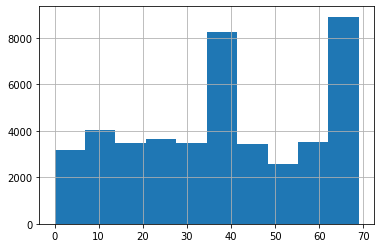

In [35]:
##checking the distribution of age variable
train_df['active_rider_age'].hist()

In [36]:
#filling missing values with mean in the age variable
train_df['active_rider_age'].fillna((train_df['active_rider_age'].mean()), inplace=True)


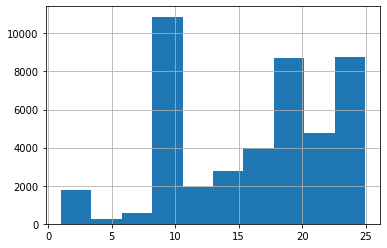

In [37]:
##checking the distribution of avg partner ratings variable
train_df['average_partner_rating'].hist()

In [38]:
#filling missing values with mean in the average_partner_rating variable
train_df['average_partner_rating'].fillna((train_df['average_partner_rating'].mean()), inplace=True)


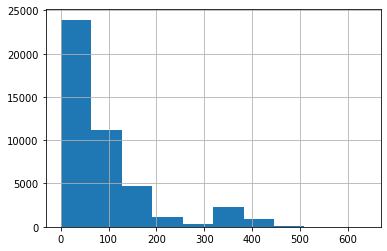

In [39]:
##checking the distribution of avg partner ratings variable
train_df['number_of_ratings'].hist()

In [40]:
#filling missing values with mean in the age variable
train_df['number_of_ratings'].fillna((train_df['number_of_ratings'].mean()), inplace=True)


In [41]:
train_df.isna().sum()

id                        0
order_id                  0
dispatch_day              0
dispatch_day_of_week      0
dispatch_time             0
client_id                 0
client_type               0
order_license_status      0
order_carrier_type        0
vendor_type               0
rider_id                  0
rider_license_status      0
rider_carrier_type        0
rider_amount              0
rider_lat                 0
rider_long                0
pickup_lat                0
pickup_long               0
drop_off_lat              0
drop_off_long             0
target                    0
active_rider_age          0
average_partner_rating    0
number_of_ratings         0
dtype: int64

In [42]:
train_df.duplicated().sum()

0

In [43]:
train_df.columns

Index(['id', 'order_id', 'dispatch_day', 'dispatch_day_of_week',
       'dispatch_time', 'client_id', 'client_type', 'order_license_status',
       'order_carrier_type', 'vendor_type', 'rider_id', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long', 'target',
       'active_rider_age', 'average_partner_rating', 'number_of_ratings'],
      dtype='object')

In [44]:
# dropping unnecessary variable: 
train_df = train_df.drop(columns = ['order_id','client_id','rider_id'])

In [45]:
train_df.head()

,id,dispatch_day,dispatch_day_of_week,dispatch_time,client_type,order_license_status,order_carrier_type,vendor_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,active_rider_age,average_partner_rating,number_of_ratings
0,ID_SCUW21PVAU,27,6,09:02:54,Business,0,2,Bike,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11.000000,10.000000,1.000000
1,ID_2HA7X30JMN,30,7,13:01:37,Personal,0,1,Bike,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,68.000000,24.130000,229.000000
2,ID_IAJWDTBY6M,14,2,10:01:00,Personal,0,2,Bike,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,38.488713,16.311388,86.207717
3,ID_LKSVPNYMTR,22,3,14:11:16,Personal,0,2,Bike,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,38.488713,16.311388,86.207717
4,ID_O7N8Y918YH,27,5,16:11:38,Business,0,2,Bike,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,38.488713,16.311388,86.207717


In [46]:
# dropping unnecessary variable: 
test_df = test_df.drop(columns = ['order_id','client_id','rider_id'])

In [47]:
test_df.head()

,id,dispatch_day,dispatch_day_of_week,dispatch_time,client_type,order_license_status,order_carrier_type,vendor_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,active_rider_age,average_partner_rating,number_of_ratings
0,ID_3B4D2Q2DSI,2,6,12:10:59,Business,0,2,Bike,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,NaN,NaN,NaN
1,ID_7MPWFJ9XFI,11,4,17:10:03,Personal,1,2,Bike,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558,8.0,19.34,332.0
2,ID_5VVT3Q3M5B,30,3,12:02:01,Personal,0,2,Bike,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860,NaN,NaN,NaN
3,ID_C2GTVS1H7K,27,2,11:10:32,Business,0,2,Bike,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921,38.0,24.76,83.0
4,ID_0YGC8V3PFT,14,6,16:12:55,Business,0,2,Bike,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454,NaN,NaN,NaN


## Checking for unique values

In [48]:
# getting the unique values of each variable
cols = train_df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", train_df[col].nunique())
    print(train_df[col].unique())
    print()

Variable: id
Number of unique values: 179867
['ID_SCUW21PVAU' 'ID_2HA7X30JMN' 'ID_IAJWDTBY6M' ... 'ID_MFL3T3X89C'
 'ID_JVG80JGEI7' 'ID_F2VWU0TAVK']

Variable: dispatch_day
Number of unique values: 31
[27 30 14 22  3 18 28 20  6 12 17  7  5  1 15 31 16  4 25 19 11 23 21  9
 13 10 26  2  8 29 24]

Variable: dispatch_day_of_week
Number of unique values: 7
[6 7 2 3 5 4 1]

Variable: dispatch_time
Number of unique values: 5636
['09:02:54' '13:01:37' '10:01:00' ... '07:01:16' '06:01:01' '20:08:53']

Variable: client_type
Number of unique values: 2
['Business' 'Personal']

Variable: order_license_status
Number of unique values: 2
[0 1]

Variable: order_carrier_type
Number of unique values: 3
[2 1 0]

Variable: vendor_type
Number of unique values: 1
['Bike']

Variable: rider_license_status
Number of unique values: 2
[0 1]

Variable: rider_carrier_type
Number of unique values: 2
[1 0]

Variable: rider_amount
Number of unique values: 177
[1080  730  490  510  400  420  800  450  610  410  390  4

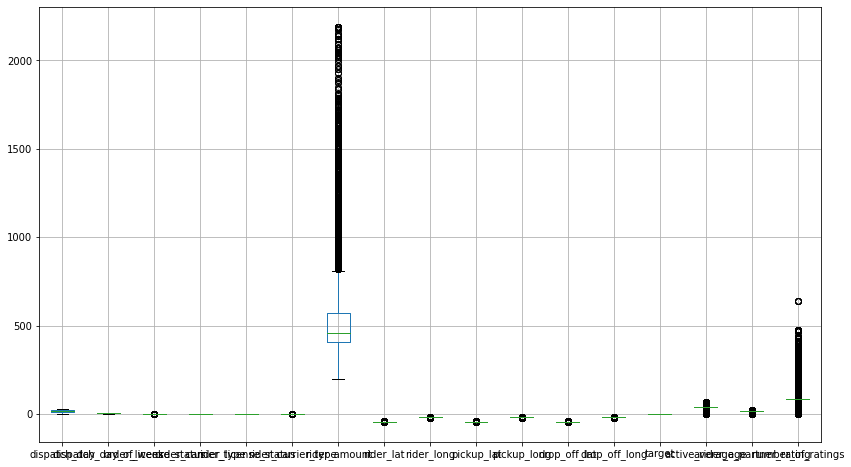

In [49]:

# checking for outliers
plt.figure(figsize = (14, 8))
train_df.boxplot()
plt.show()

Observation: We have outliers in our dataset but we don't drop as they may be useful during modeling

## Exploratory Data Analysis

### Univariate Analysis- Here we exanine one variable

We will now perform univariate analysis. This is a type of analysis done on only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

In [50]:
train_df.head()

,id,dispatch_day,dispatch_day_of_week,dispatch_time,client_type,order_license_status,order_carrier_type,vendor_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,active_rider_age,average_partner_rating,number_of_ratings
0,ID_SCUW21PVAU,27,6,09:02:54,Business,0,2,Bike,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11.000000,10.000000,1.000000
1,ID_2HA7X30JMN,30,7,13:01:37,Personal,0,1,Bike,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,68.000000,24.130000,229.000000
2,ID_IAJWDTBY6M,14,2,10:01:00,Personal,0,2,Bike,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,38.488713,16.311388,86.207717
3,ID_LKSVPNYMTR,22,3,14:11:16,Personal,0,2,Bike,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,38.488713,16.311388,86.207717
4,ID_O7N8Y918YH,27,5,16:11:38,Business,0,2,Bike,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,38.488713,16.311388,86.207717


In [51]:
train_df.dtypes

id                         object
dispatch_day                int64
dispatch_day_of_week        int64
dispatch_time              object
client_type                object
order_license_status        int64
order_carrier_type          int64
vendor_type                object
rider_license_status        int64
rider_carrier_type          int64
rider_amount                int64
rider_lat                 float64
rider_long                float64
pickup_lat                float64
pickup_long               float64
drop_off_lat              float64
drop_off_long             float64
target                      int64
active_rider_age          float64
average_partner_rating    float64
number_of_ratings         float64
dtype: object

In [52]:
## Summary statistic
train_df.describe()

,dispatch_day,dispatch_day_of_week,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,active_rider_age,average_partner_rating,number_of_ratings
count,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000
mean,16.604903,4.185198,0.239555,1.619007,0.589936,0.868731,517.544185,-42.817124,-17.286813,-42.817156,-17.286229,-42.814879,-17.282547,0.652843,38.488713,16.311388,86.207717
std,8.528368,1.683574,0.426813,0.536552,0.491846,0.337695,157.385430,0.106837,0.100707,0.106425,0.100101,0.114158,0.103640,0.791099,10.050473,3.014491,51.835013
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,200.000000,-45.736540,-20.079067,-45.725110,-20.070241,-45.793523,-20.352897,0.000000,0.000000,1.000000,0.000000
25%,9.000000,3.000000,0.000000,1.000000,0.000000,1.000000,410.000000,-42.832252,-17.301329,-42.829119,-17.299970,-42.830628,-17.301066,0.000000,38.488713,16.311388,86.207717
50%,17.000000,4.000000,0.000000,2.000000,1.000000,1.000000,460.000000,-42.813961,-17.286776,-42.820037,-17.283554,-42.806976,-17.282880,0.000000,38.488713,16.311388,86.207717
75%,24.000000,6.000000,0.000000,2.000000,1.000000,1.000000,570.000000,-42.791405,-17.264774,-42.789742,-17.263246,-42.783811,-17.259310,1.000000,38.488713,16.311388,86.207717
max,31.000000,7.000000,1.000000,2.000000,1.000000,1.000000,2190.000000,-40.676917,-15.480446,-40.699055,-15.482671,-40.683763,-15.324765,2.000000,69.000000,24.960000,637.000000


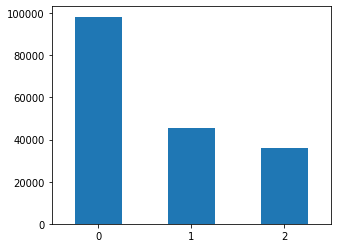

In [53]:
# checking if our target variable is balanced
# univariate analysis: target variable
plt.figure(figsize = (5, 4))
train_df.target.value_counts().plot(kind = 'bar', rot = 0);

there are more 0(ignore)records in our dataset ,followed by decline (1) or accept (2) a dispatch

In [54]:
train_df.columns

Index(['id', 'dispatch_day', 'dispatch_day_of_week', 'dispatch_time',
       'client_type', 'order_license_status', 'order_carrier_type',
       'vendor_type', 'rider_license_status', 'rider_carrier_type',
       'rider_amount', 'rider_lat', 'rider_long', 'pickup_lat', 'pickup_long',
       'drop_off_lat', 'drop_off_long', 'target', 'active_rider_age',
       'average_partner_rating', 'number_of_ratings'],
      dtype='object')

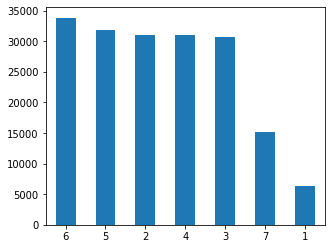

In [55]:

plt.figure(figsize = (5, 4))
train_df.dispatch_day_of_week.value_counts().plot(kind = 'bar', rot = 0);

on the 6th day of the week there were more dispatches

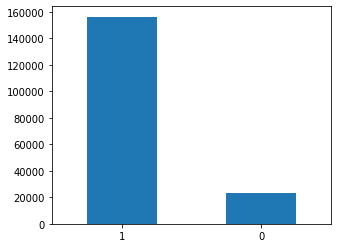

In [56]:

plt.figure(figsize = (5, 4))
train_df.rider_carrier_type.value_counts().plot(kind = 'bar', rot = 0);

There were more carrier type 1 than 0

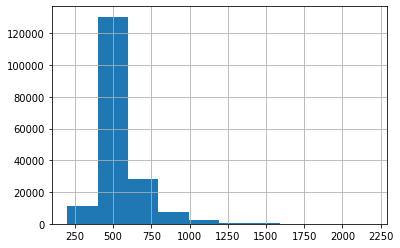

In [57]:
train_df["rider_amount"].hist(bins=10)

In [58]:
train_df['rider_amount'].value_counts(ascending=False)

400     29339
430     16221
420     10909
490     10427
390      9593
        ...  
1850        1
2170        1
1880        1
1780        1
1870        1
Name: rider_amount, Length: 177, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


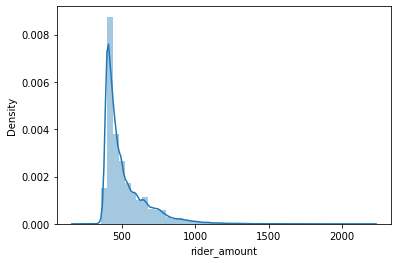

In [59]:
# univariate analysis: rider_amount variable
sns.distplot(train_df.rider_amount);

Price is skewed to the right

## Bivariate Analysis

we analyze the relationship btn our target variable & other variables

In [60]:
train_df.columns

Index(['id', 'dispatch_day', 'dispatch_day_of_week', 'dispatch_time',
       'client_type', 'order_license_status', 'order_carrier_type',
       'vendor_type', 'rider_license_status', 'rider_carrier_type',
       'rider_amount', 'rider_lat', 'rider_long', 'pickup_lat', 'pickup_long',
       'drop_off_lat', 'drop_off_long', 'target', 'active_rider_age',
       'average_partner_rating', 'number_of_ratings'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


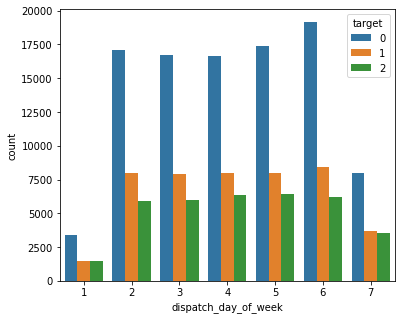

In [61]:
# bivariate analysis: target by dispatch day variables
plt.figure(figsize = (6, 5))
sns.countplot('dispatch_day_of_week', hue = 'target', data = train_df);

Most orders were ignored on the 6th day

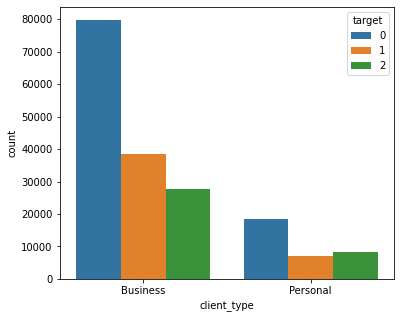

In [62]:
# bivariate analysis: target by client_type variables
plt.figure(figsize = (6, 5))
sns.countplot(x='client_type', hue = 'target', data = train_df);

More orders were made from businesses

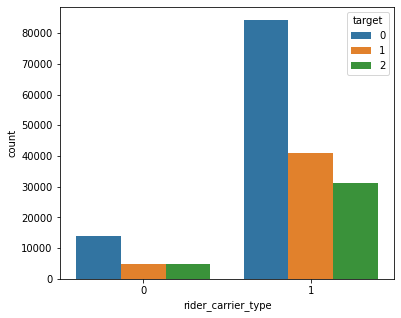

In [63]:
# bivariate analysis: target by rider_carrier_type variables
plt.figure(figsize = (6, 5))
sns.countplot(x='rider_carrier_type', hue = 'target', data = train_df);

rider-carrier-type had more orders

In [64]:
train_df.columns

Index(['id', 'dispatch_day', 'dispatch_day_of_week', 'dispatch_time',
       'client_type', 'order_license_status', 'order_carrier_type',
       'vendor_type', 'rider_license_status', 'rider_carrier_type',
       'rider_amount', 'rider_lat', 'rider_long', 'pickup_lat', 'pickup_long',
       'drop_off_lat', 'drop_off_long', 'target', 'active_rider_age',
       'average_partner_rating', 'number_of_ratings'],
      dtype='object')

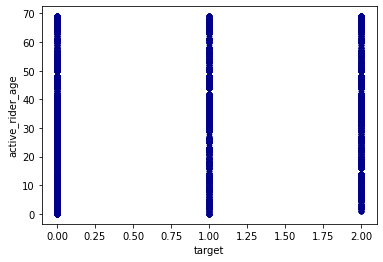

In [65]:
# bivariate analysis: target by active_rider_age variables

ax1 = train_df.plot.scatter(x='target',
                      y='active_rider_age',
                      c='DarkBlue')

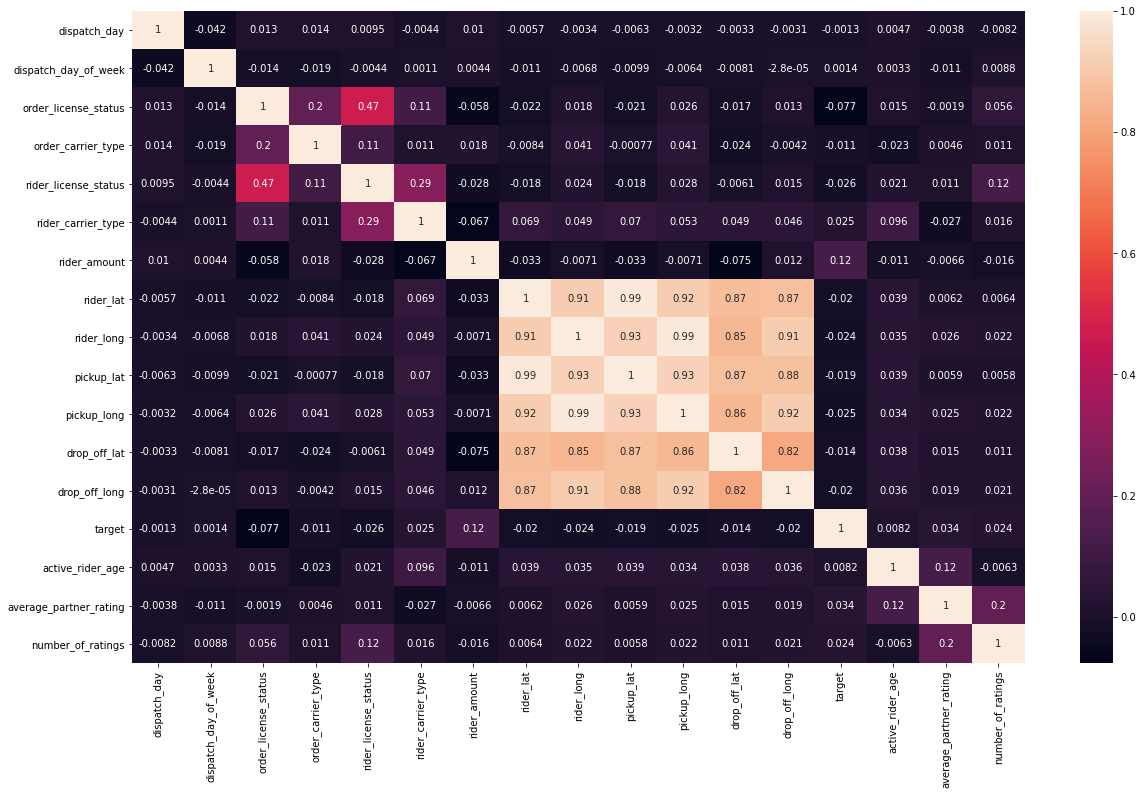

In [66]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (20, 12))
sns.heatmap(train_df.corr(), annot=True, );

All varaibles have a weak correlation to our target variable

In [67]:
train_df.corr()

,dispatch_day,dispatch_day_of_week,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,active_rider_age,average_partner_rating,number_of_ratings
dispatch_day,1.000000,-0.042488,0.012625,0.014123,0.009466,-0.004434,0.010065,-0.005688,-0.003430,-0.006340,-0.003201,-0.003291,-0.003128,-0.001308,0.004670,-0.003836,-0.008250
dispatch_day_of_week,-0.042488,1.000000,-0.013864,-0.019226,-0.004414,0.001053,0.004447,-0.010683,-0.006819,-0.009943,-0.006364,-0.008065,-0.000028,0.001395,0.003291,-0.010875,0.008821
order_license_status,0.012625,-0.013864,1.000000,0.195899,0.467704,0.113604,-0.058041,-0.022029,0.017722,-0.021121,0.025555,-0.017327,0.013253,-0.076726,0.014806,-0.001940,0.055965
order_carrier_type,0.014123,-0.019226,0.195899,1.000000,0.106393,0.011211,0.018328,-0.008363,0.040508,-0.000765,0.041450,-0.023534,-0.004211,-0.011106,-0.022578,0.004617,0.011285
rider_license_status,0.009466,-0.004414,0.467704,0.106393,1.000000,0.286964,-0.027711,-0.018145,0.024066,-0.017882,0.027880,-0.006143,0.015262,-0.025937,0.021382,0.010684,0.124096
rider_carrier_type,-0.004434,0.001053,0.113604,0.011211,0.286964,1.000000,-0.067175,0.068990,0.049431,0.069593,0.053466,0.049258,0.046095,0.024563,0.095913,-0.027382,0.016466
rider_amount,0.010065,0.004447,-0.058041,0.018328,-0.027711,-0.067175,1.000000,-0.033229,-0.007061,-0.033394,-0.007145,-0.075227,0.012466,0.123772,-0.010928,-0.006596,-0.015776
rider_lat,-0.005688,-0.010683,-0.022029,-0.008363,-0.018145,0.068990,-0.033229,1.000000,0.914423,0.994349,0.915676,0.870438,0.874255,-0.019695,0.038669,0.006164,0.006438
rider_long,-0.003430,-0.006819,0.017722,0.040508,0.024066,0.049431,-0.007061,0.914423,1.000000,0.928259,0.993747,0.852945,0.909791,-0.023646,0.035437,0.025728,0.022236
pickup_lat,-0.006340,-0.009943,-0.021121,-0.000765,-0.017882,0.069593,-0.033394,0.994349,0.928259,1.000000,0.928272,0.874896,0.881132,-0.019450,0.039363,0.005874,0.005803


In [68]:
# One hot encoding to convert catagorical variables to numerical
train_df = pd.get_dummies(train_df, columns=['client_type', 'vendor_type'])
test_df = pd.get_dummies(test_df, columns=['client_type', 'vendor_type'])

In [69]:
train_df.head()

,id,dispatch_day,dispatch_day_of_week,dispatch_time,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,active_rider_age,average_partner_rating,number_of_ratings,client_type_Business,client_type_Personal,vendor_type_Bike
0,ID_SCUW21PVAU,27,6,09:02:54,0,2,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,11.000000,10.000000,1.000000,1,0,1
1,ID_2HA7X30JMN,30,7,13:01:37,0,1,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,68.000000,24.130000,229.000000,0,1,1
2,ID_IAJWDTBY6M,14,2,10:01:00,0,2,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,38.488713,16.311388,86.207717,0,1,1
3,ID_LKSVPNYMTR,22,3,14:11:16,0,2,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,38.488713,16.311388,86.207717,0,1,1
4,ID_O7N8Y918YH,27,5,16:11:38,0,2,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,38.488713,16.311388,86.207717,1,0,1


In [70]:
test_df.head()

,id,dispatch_day,dispatch_day_of_week,dispatch_time,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,active_rider_age,average_partner_rating,number_of_ratings,client_type_Business,client_type_Personal,vendor_type_Bike
0,ID_3B4D2Q2DSI,2,6,12:10:59,0,2,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,NaN,NaN,NaN,1,0,1
1,ID_7MPWFJ9XFI,11,4,17:10:03,1,2,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558,8.0,19.34,332.0,0,1,1
2,ID_5VVT3Q3M5B,30,3,12:02:01,0,2,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860,NaN,NaN,NaN,0,1,1
3,ID_C2GTVS1H7K,27,2,11:10:32,0,2,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921,38.0,24.76,83.0,1,0,1
4,ID_0YGC8V3PFT,14,6,16:12:55,0,2,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454,NaN,NaN,NaN,1,0,1


In [71]:
test_df.isna().sum()

id                            0
dispatch_day                  0
dispatch_day_of_week          0
dispatch_time                 0
order_license_status          0
order_carrier_type            0
rider_license_status          0
rider_carrier_type            0
rider_amount                  0
rider_lat                     0
rider_long                    0
pickup_lat                    0
pickup_long                   0
drop_off_lat                  0
drop_off_long                 0
active_rider_age          57970
average_partner_rating    57970
number_of_ratings         57970
client_type_Business          0
client_type_Personal          0
vendor_type_Bike              0
dtype: int64

In [72]:
#filling missing values with mean in the age variable
test_df['active_rider_age'].fillna((test_df['active_rider_age'].mean()), inplace=True)
#filling missing values with mean in the age variable
test_df['average_partner_rating'].fillna((test_df['average_partner_rating'].mean()), inplace=True)


In [ ]:
test_df.isna().sum()

dispatch_day                  0
dispatch_day_of_week          0
dispatch_time                 0
order_license_status          0
order_carrier_type            0
rider_license_status          0
rider_carrier_type            0
rider_amount                  0
rider_lat                     0
rider_long                    0
pickup_lat                    0
pickup_long                   0
drop_off_lat                  0
drop_off_long                 0
active_rider_age          57970
average_partner_rating    57970
number_of_ratings             0
client_type_Business          0
client_type_Personal          0
vendor_type_Bike              0
dtype: int64

## Modeling

In [73]:

train_df=train_df.set_index('id')
test_df=test_df.set_index('id')

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179867 entries, ID_SCUW21PVAU to ID_F2VWU0TAVK
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dispatch_day            179867 non-null  int64  
 1   dispatch_day_of_week    179867 non-null  int64  
 2   dispatch_time           179867 non-null  object 
 3   order_license_status    179867 non-null  int64  
 4   order_carrier_type      179867 non-null  int64  
 5   rider_license_status    179867 non-null  int64  
 6   rider_carrier_type      179867 non-null  int64  
 7   rider_amount            179867 non-null  int64  
 8   rider_lat               179867 non-null  float64
 9   rider_long              179867 non-null  float64
 10  pickup_lat              179867 non-null  float64
 11  pickup_long             179867 non-null  float64
 12  drop_off_lat            179867 non-null  float64
 13  drop_off_long           179867 non-null  float64
 14  target

In [75]:
train_df['dispatch_time'] =  pd.to_datetime(train_df['dispatch_time'], format='%H:%M:%S')
train_df['dispatch_time'] = train_df['dispatch_time'].apply(lambda x: x.value)



In [76]:
# #feature engineering
# train_df['hour'] = train_df.dt.hour
# train_df['minute'] = train_df.dt.minute
# train_df['second'] = train_df.dt.second

In [77]:
# dividing our dataset into features (X) and target (y)
X = train_df.drop(columns = ['target']).values
y = train_df['target'].values

print(X.shape)
print(y.shape)

(179867, 20)
(179867,)


In [78]:
# splitting our dataset into 80-20 train-test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [79]:
# model creation
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()

# training our model
logistic_classifier.fit(X_train, y_train)

# making predictions
y_pred_logistic = logistic_classifier.predict(X_test)

In [80]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_pred_logistic, y_test))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

0.5467559904375382
[[19669     0     0]
 [ 9125     0     0]
 [ 7180     0     0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     19669
           1       0.00      0.00      0.00      9125
           2       0.00      0.00      0.00      7180

    accuracy                           0.55     35974
   macro avg       0.18      0.33      0.24     35974
weighted avg       0.30      0.55      0.39     35974



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:

# Check score
accuracy_score(y_test, y_pred_logistic)

0.5467559904375382

In [84]:
# #predict test set
# pred=lgbm.predict_proba(test_df.drop['id','target'],1)

# making predictions
y_pred_logistic = logistic_classifier.predict(X_test)

In [85]:
# Make predictions in test set and prepare submission file
predictions = logistic_classifier.predict(test_df)
sub_file = ss.copy()
sub_file.target = predictions
sub_file.to_csv('Baseline.csv', index = False)

ValueError: ignored

In [86]:
test_df['dispatch_time'] =  pd.to_datetime(test_df['dispatch_time'], format='%H:%M:%S')
test_df['dispatch_time'] = test_df['dispatch_time'].apply(lambda x: x.value)

In [87]:
test_df.head()

,dispatch_day,dispatch_day_of_week,dispatch_time,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,active_rider_age,average_partner_rating,number_of_ratings,client_type_Business,client_type_Personal,vendor_type_Bike
id,,,,,,,,,,,,,,,,,,,,
ID_3B4D2Q2DSI,2,6,-2208944941000000000,0,2,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240,38.660273,16.291133,NaN,1,0,1
ID_7MPWFJ9XFI,11,4,-2208926997000000000,1,2,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558,8.000000,19.340000,332.0,0,1,1
ID_5VVT3Q3M5B,30,3,-2208945479000000000,0,2,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860,38.660273,16.291133,NaN,0,1,1
ID_C2GTVS1H7K,27,2,-2208948568000000000,0,2,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921,38.000000,24.760000,83.0,1,0,1
ID_0YGC8V3PFT,14,6,-2208930425000000000,0,2,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454,38.660273,16.291133,NaN,1,0,1


In [88]:
# Split data
main_cols = train_df.columns.difference(['ID', 'order_id', 'rider_id', 'Rider ID', 'target', 'dispatch_time',	'client_id']).values
X = train_df[main_cols]
y = train_df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3031)

# Train a model
model = LGBMClassifier(random_state=3031)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
accuracy_score(y_test, y_pred)

0.581058542280536

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Initialising the random forest classifier
classifier = RandomForestClassifier(random_state=3031)

# Fitting the model on the training set
classifier.fit(X_train, y_train)

# Running the prediction
y_pred1 = classifier.predict(X_test)


# Check score
accuracy_score(y_test, y_pred)

0.581058542280536

In [91]:

from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB().fit(X_train, y_train)
y_pred_bayes = naive_bayes.predict(X_test)
# model evaluation
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred_logistic))
print(metrics.classification_report(y_test, y_pred_logistic))

[[19834     0     0]
 [ 8972     0     0]
 [ 7168     0     0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     19834
           1       0.00      0.00      0.00      8972
           2       0.00      0.00      0.00      7168

    accuracy                           0.55     35974
   macro avg       0.18      0.33      0.24     35974
weighted avg       0.30      0.55      0.39     35974



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# Make predictions in test set and prepare submission file
predictions = classifier.predict(test_df[main_cols])
sub_file = ss.copy()
sub_file.target = predictions
sub_file.to_csv('Baseline123.csv', index = False)

ValueError: ignored

Feature Engineering

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Initialising the random forest classifier
classifier = RandomForestClassifier()

# Fitting the model on the training set
classifier.fit(X_train, y_train)

# Running the prediction
y_pred = classifier.predict(X_test)

# Comparing the true and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_df.head()

,Actual,Predicted
0,1,1
1,1,0
2,0,0
3,0,2
4,0,0


In [94]:
# Checking the accuracy
# model evaluation
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred_logistic))
print(metrics.classification_report(y_test, y_pred_logistic))

[[19834     0     0]
 [ 8972     0     0]
 [ 7168     0     0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     19834
           1       0.00      0.00      0.00      8972
           2       0.00      0.00      0.00      7168

    accuracy                           0.55     35974
   macro avg       0.18      0.33      0.24     35974
weighted avg       0.30      0.55      0.39     35974



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:

from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB().fit(X_train, y_train)
y_pred_bayes = naive_bayes.predict(X_test)
# model evaluation
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred_logistic))
print(metrics.classification_report(y_test, y_pred_logistic))

[[19834     0     0]
 [ 8972     0     0]
 [ 7168     0     0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     19834
           1       0.00      0.00      0.00      8972
           2       0.00      0.00      0.00      7168

    accuracy                           0.55     35974
   macro avg       0.18      0.33      0.24     35974
weighted avg       0.30      0.55      0.39     35974



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# importing our machine learning algorithms  

from sklearn.ensemble import GradientBoostingClassifier
# instantiating our algorithms

gbm_classifier = GradientBoostingClassifier()
# training our models
gbm_classifier.fit(X_train, y_train)
# making predictions
gbm_y_pred = gbm_classifier.predict(X_test)
# model evaluation
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred_logistic))
print(metrics.classification_report(y_test, y_pred_logistic))

[[19834     0     0]
 [ 8972     0     0]
 [ 7168     0     0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71     19834
           1       0.00      0.00      0.00      8972
           2       0.00      0.00      0.00      7168

    accuracy                           0.55     35974
   macro avg       0.18      0.33      0.24     35974
weighted avg       0.30      0.55      0.39     35974



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
train_df.columns

Index(['dispatch_day', 'dispatch_day_of_week', 'dispatch_time',
       'order_license_status', 'order_carrier_type', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long', 'target',
       'active_rider_age', 'average_partner_rating', 'number_of_ratings',
       'client_type_Business', 'client_type_Personal', 'vendor_type_Bike'],
      dtype='object')

In [ ]:
dispatch_day, dispatch_day_of_week, dispatch_time, order_license_status, order_carrier_type,rider_license_status,
rider_carrier_type,rider_amount, active_rider_age, average_partner_rating, number_of_ratings,client_type_Business,client_type_Business 

In [ ]:
# Split data
main_cols1 = train_df(['dispatch_day','dispatch_day_of_week', 'dispatch_time', 'order_license_status', 'order_carrier_type','rider_license_status','rider_carrier_type','rider_amount', 'active_rider_age', 'average_partner_rating', 'number_of_ratings','client_type_Business','client_type_Business' ]).to_list()
X1 = [main_cols1]
y1 = train_df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3031)

# Train a model
model = LGBMClassifier(random_state=3031)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check score
accuracy_score(y_test, y_pred)